In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [2]:
pjme = pd.read_csv('PJME_hourly.csv', index_col=[0], parse_dates=[0])
pjme.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498
2002-12-31 02:00:00,25147
2002-12-31 03:00:00,24574
2002-12-31 04:00:00,24393
2002-12-31 05:00:00,24860


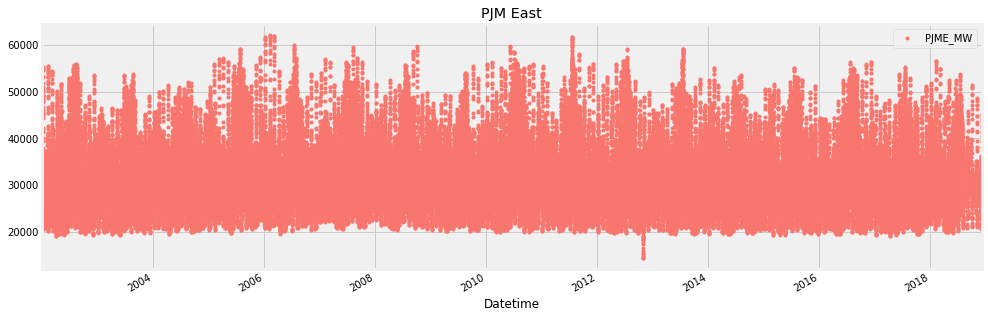

In [3]:
# visualisation of past data
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = pjme.plot(style='.', figsize=(15,5), color=color_pal[0], title='PJM East')

In [4]:
# Train test split
split_date = '01-Jan-2015'
pjme_train = pjme.loc[pjme.index <= split_date].copy()
pjme_test = pjme.loc[pjme.index > split_date].copy()

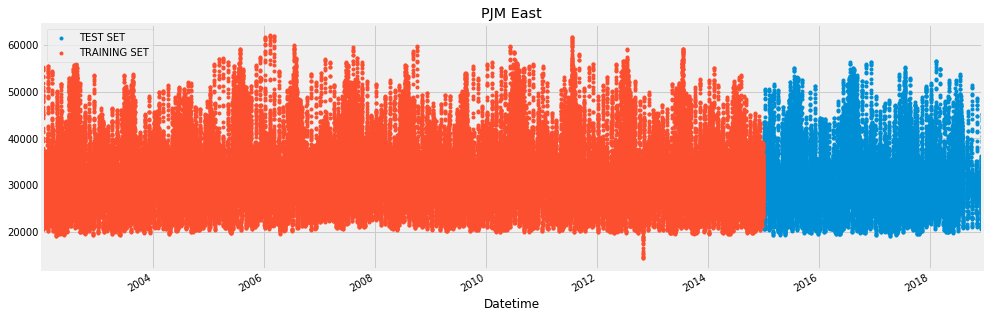

In [5]:
_ = pjme_test \
    .rename(columns={'PJME_MW': 'TEST SET'}) \
    .join(pjme_train.rename(columns={'PJME_MW': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='PJM East', style='.')

In [6]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [7]:
X_train, y_train = create_features(pjme_train, label='PJME_MW')
X_test, y_test = create_features(pjme_test, label='PJME_MW')

In [8]:
# Create XGBoost Model
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
        verbose=True) # Change verbose to True if you want to see it train

[23:52:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:29718.2	validation_1-rmse:28781
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.


/Users/air/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/air/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[1]	validation_0-rmse:26838.8	validation_1-rmse:25905.7
[2]	validation_0-rmse:24246.3	validation_1-rmse:23321.9
[3]	validation_0-rmse:21922.6	validation_1-rmse:21008.3
[4]	validation_0-rmse:19846.9	validation_1-rmse:18949.3
[5]	validation_0-rmse:17982.4	validation_1-rmse:17098.3
[6]	validation_0-rmse:16314.1	validation_1-rmse:15448.4
[7]	validation_0-rmse:14831.9	validation_1-rmse:13984.3
[8]	validation_0-rmse:13502.2	validation_1-rmse:12675
[9]	validation_0-rmse:12327.6	validation_1-rmse:11525.6
[10]	validation_0-rmse:11275.3	validation_1-rmse:10505.7
[11]	validation_0-rmse:10351.1	validation_1-rmse:9614.84
[12]	validation_0-rmse:9528.57	validation_1-rmse:8819.81
[13]	validation_0-rmse:8811.19	validation_1-rmse:8145.44
[14]	validation_0-rmse:8179.97	validation_1-rmse:7559.73
[15]	validation_0-rmse:7620.51	validation_1-rmse:7034.3
[16]	validation_0-rmse:7128.98	validation_1-rmse:6593.3
[17]	validation_0-rmse:6714.79	validation_1-rmse:6233.5
[18]	validation_0-rmse:6356.87	validation_1-r

[145]	validation_0-rmse:3407.52	validation_1-rmse:3976.49
[146]	validation_0-rmse:3406.41	validation_1-rmse:3975.61
[147]	validation_0-rmse:3402.9	validation_1-rmse:3986.06
[148]	validation_0-rmse:3401.14	validation_1-rmse:3986.49
[149]	validation_0-rmse:3398.39	validation_1-rmse:3988.72
[150]	validation_0-rmse:3396.99	validation_1-rmse:3988.28
[151]	validation_0-rmse:3394.11	validation_1-rmse:3985.76
[152]	validation_0-rmse:3393.35	validation_1-rmse:3984.24
[153]	validation_0-rmse:3392.43	validation_1-rmse:3983.77
[154]	validation_0-rmse:3391.52	validation_1-rmse:3984.52
[155]	validation_0-rmse:3390.42	validation_1-rmse:3984.38
[156]	validation_0-rmse:3387.5	validation_1-rmse:3984.74
[157]	validation_0-rmse:3383.68	validation_1-rmse:3981.78
[158]	validation_0-rmse:3382.93	validation_1-rmse:3981.64
[159]	validation_0-rmse:3382.04	validation_1-rmse:3978.38
[160]	validation_0-rmse:3381.6	validation_1-rmse:3979.52
[161]	validation_0-rmse:3380.16	validation_1-rmse:3978.9
[162]	validation_0

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

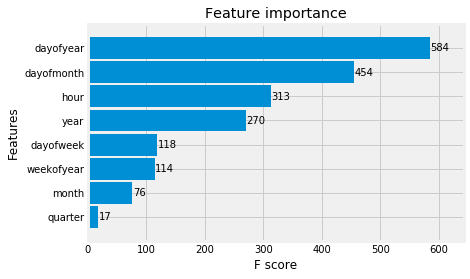

In [9]:
_ = plot_importance(reg, height=0.9)

In [10]:
pjme_test['MW_Prediction'] = reg.predict(X_test)
pjme_all = pd.concat([pjme_test, pjme_train], sort=False)

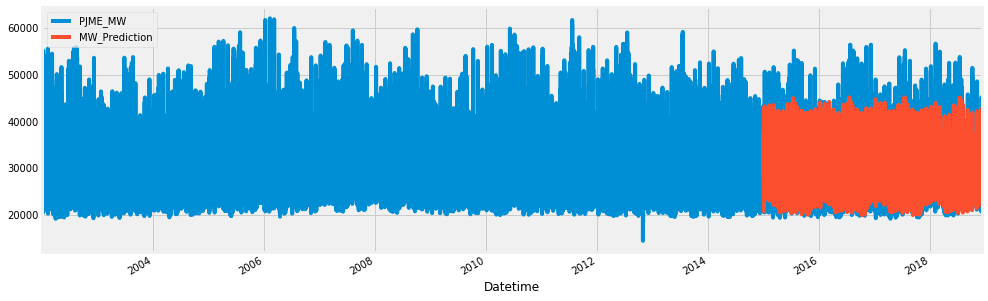

In [11]:
_ = pjme_all[['PJME_MW','MW_Prediction']].plot(figsize=(15, 5))

In [12]:
# Use pickle library to save model
import pickle
pickle.dump(reg, open("model.pickle.dat", "wb"))